In [1]:
import torch
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

from utils import plot_2d, load_plot_2d, load_model_from_checkpoint, correlation_coefficients
from utils import plot_5d_correlations, print_cc_mean_std
    
from main_save_mcc import train_model, test_model
from lib.metrics import mean_corr_coef as mcc

In [2]:
MODEL_DIR = "pt_models/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RESULTS_DIR = "results/"

### Template to train your own model

In [3]:
x = '1000_40_5_5_3_1_gauss_xtanh_u_f' # argument string to generate a dataset. Usage explained in lib.data.create_if_not_exist_dataset.
i = 'iFlow' # Model type
ft = 'RQNSF_AG' # Flow type
npa = 'Softplus' # Natural parameter activation function
fl = 10 # Flow length
lr_df = 0.25 # Learning rate drop factor
lr_pn = 10 # Learning rate patience
b = 64 # Batch size
e = 20 # Epochs
l = 1e-3 # Learning rate
s = 1 # Model seed
u = 0 # GPU ID
# Add '-c' to use cuda GPU
# Add '-p' to preload data on GPU for increased performance

# Uncomment to train own model - This takes approximately 30 minutes on an RTX 2020 GPU.
# !python main_save_mcc.py \
#         -x x \
#         -i i \
#         -ft ft \
#         -npa npa \
#         -fl fl \
#         -lr_df lr_df \
#         -lr_pn lr_pn \
#         -b b \
#         -e e \
#         -l l \
#         -s s \
#         -u u \
#         -c \
#         -p

### Template for loading a model checkpoint

In [5]:
# Manually test a checkpoint's MCC performance
folder_name = '1000_5_2_2_3_1_gauss_xtanh_u_f_iFlow_20'

CKPT_PATH = osp.join(MODEL_DIR, folder_name, '_ckpt_final.pth').replace("\\","/")

model = load_model_from_checkpoint(CKPT_PATH, device=device)

model.eval()
test_model(model, device=device)

## Reproduced results on synthetic dataset

## iFlow MCC and  Deep Energy

### To retrain the models for 60 seeds, uncomment and run the following cells
#### ! Warning - This takes approximately 30 minutes per seed on an RTX 2080 GPU!

In [3]:
# Linux
# !scripts/run_iFlow.sh

# Windows
# !scripts/run_iFlow.bat

### Then uncomment and run the following cells to calculate the MCCs and retrieve the energy values.


In [4]:
# Linux
# !scripts/calculate_MCCs.sh

# Windows
# !scripts/run_calculate_MCCs.bat


# read_energy_values_from_tensorboard()

In [5]:
def plot_test_performances():
    """
    Plots the MCC and Deep Energy results of the base dataset for seeds 1 to 60.
    """
    with open(osp.join(RESULTS_DIR, 'eval_performances.txt')) as f:
        performances = list(map(eval, f.readline().split(',')[1:]))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
    fig.tight_layout()

    ax1.plot(performances, '-.', color='gold', label=f'iFlow:{round(np.mean(performances), 4)}({round(np.std(performances), 4)})')
    ax1.legend()
    ax1.set_xlabel('Seed Number')
    ax1.set_ylabel('MCC')

    energy_values = np.load(os.path.join('results', 'energy_values.npy'))

    ax2.plot(energy_values, '-.', color='gold', label=f'iFlow:{round(np.mean(energy_values), 4)}')
    ax2.legend()
    ax2.set_xlabel('Seed Number')
    ax2.set_ylabel('Energy Value')
    plt.show()

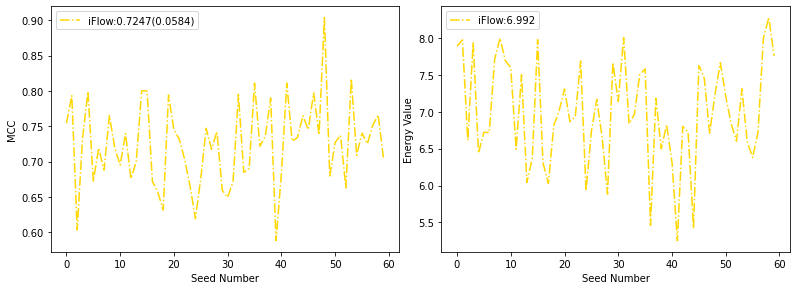

In [6]:
plot_test_performances()

## Visualization of 2D cases (seed 1 to 4)

### To retrain models for this experiment, instead of using the provided checkpoints and results, uncomment and run this cell.

In [7]:
# seeds = range(1, 5)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_3_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove previous results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_3.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_3.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu

#### Number of mixing layers = 3

Number of layers in dataset mixing MLP:  3
iFlow mean = 0.7727, std = 0.0770
iVAE mean = 0.8176, std = 0.0561
Dataset seed = 1


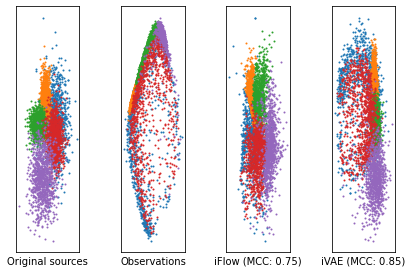

Dataset seed = 2


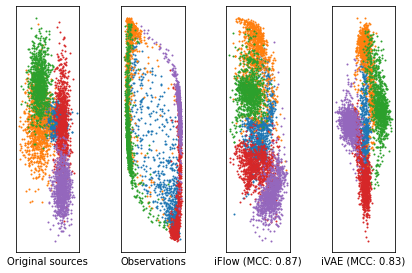

Dataset seed = 3


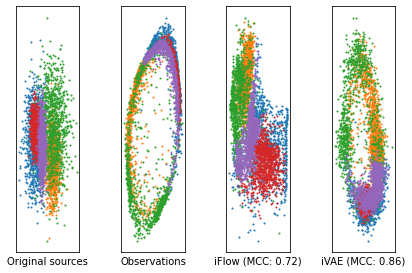

Dataset seed = 4


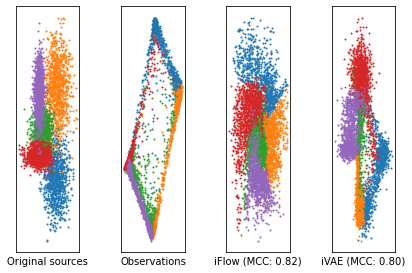

In [6]:
# These files are saved as: 'i-what_nps_dl_nl' = 'model_type, number of points, latent dim, number of MLP layers'
iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_3.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_3.txt').replace("\\","/")

seeds = range(1, 5)
# Arguments for the used 2D dataset is the following string: '1000_5_2_2_3_$seed_gauss_xtanh_u_f'
# For plotting, seed argument will automatically be replaced by the correct seed (1-10)
data_args = "1000_5_2_2_3_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers = 3, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

# Consistency across latent dimensions

### Run following script to re-generate latent estimations for iFlow and iVAE, seed 49

In [10]:
# seed = 49

# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_40_5_5_3_$seedvar_gauss_xtanh_u_f' # 1000 points, 40 segments, 5 latent & data dim, 3 layered MLP, seed, prior, act, uncentered, no_noise
# epochs = 20
# batch_size = 64
# i_what = 'iFlow'

# # Add correct seed to model arguments
# temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
# # Use -mcc or --save_mcc argument to log (append) seed performance to .txt file
# !python main_save_mcc.py --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
# !python main_save_mcc.py --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu


iFlow performance on dataset
Dataset seed =  49
MCC =  0.9039


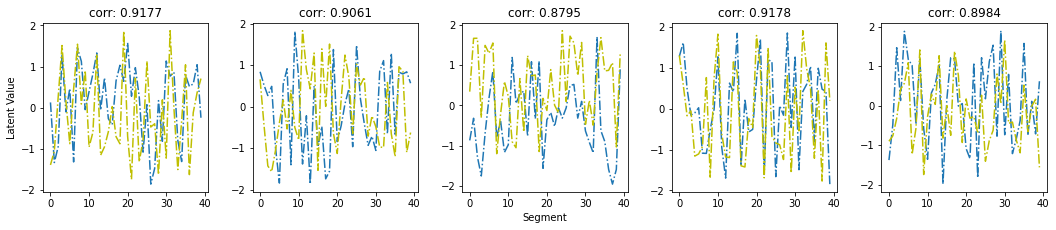

iVAE performance on dataset
Dataset seed =  49
MCC =  0.4297


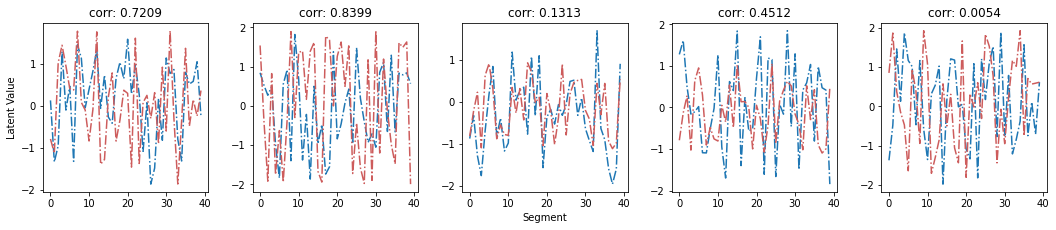

In [11]:
# Insert correct path to latent estimations for current dataset properties
plot_5d_correlations(z_est_dataset_dir='z_est/1000_40_5_5_3_49_gauss_xtanh_u_f_20', show_iFlow=True)

## Model average correlation coefficient per dimension, measured over 60 seeds.

### To retrain models for this experiment, instead of using the provided checkpoints and results, uncomment and run this cell.

In [ ]:
## For this to work, the previous training of the iFlow models has to have been run.

# Linux
# !scripts/calculate_CCs.sh

# Windows
# !scripts/run_calculate_CCs.bat

In [12]:
# # Training iVAE models and storing correlation coeffients to file

# seeds = range(1, 61)
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_40_5_5_3_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64
# i_what = 'iVAE' # 'iFlow' or 'iVAE'

# # Remove old results
# if os.path.exists("results/iVAE_correlations/iVAE_1000_40_3.txt"):
#     os.remove("results/iVAE_correlations/iVAE_1000_40_3.txt")

# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
#     # Use -mcc or --save_mcc argument to log (append) seed performance to .txt file
#     !python calculate_iVAE_correlations.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=$i_what --cuda --preload-gpu


In [7]:
print("iFlow performance:")
print_cc_mean_std("results/cc_across_dims/iFlow_1000_40_3.txt")

print("")
print("iVAE performance:")
print_cc_mean_std("results/iVAE_correlations/iVAE_1000_40_3.txt")

iFlow performance:
means:  [0.725  0.7469 0.7076 0.7134 0.7304]
standard deviations:  [0.126  0.1121 0.1225 0.1118 0.1306]

iVAE performance:
means:  [0.4996 0.4824 0.4569 0.4421 0.5002]
standard deviations:  [0.257  0.259  0.2826 0.2561 0.249 ]


## Extensions: comparison of iFlow and iVAE on increased dataset complexity

### To retrain models for this experiment, instead of using the provided checkpoints and results, uncomment and run this cell.

In [14]:
# # Experiment for MLP layers = 4
# seeds = range(1, 5)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_4_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove old results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_4.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_4.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_4.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_4.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu


# # Experiment for MLP layers = 5
# seeds = range(1, 5)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_5_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove old results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_5.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_5.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_5.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_5.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu

#### Number of mixing layers = 4

Number of layers in dataset mixing MLP:  4
iFlow mean = 0.7374, std = 0.1083
iVAE mean = 0.6874, std = 0.1188
Dataset seed = 1


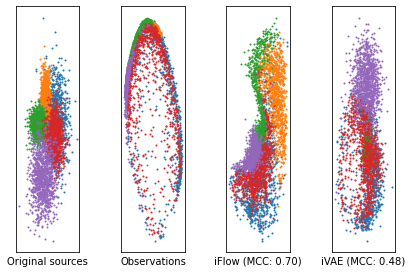

Dataset seed = 2


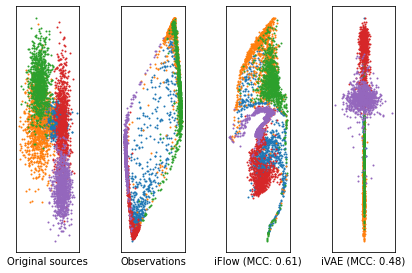

Dataset seed = 3


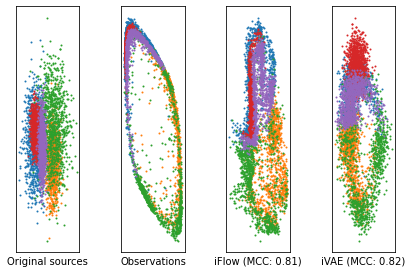

Dataset seed = 4


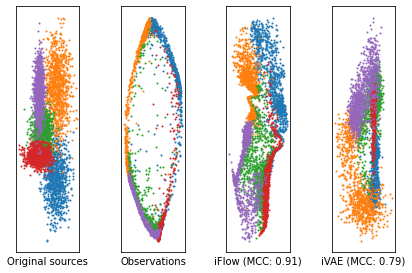

In [8]:
iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_4.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_4.txt').replace("\\","/")

seeds = range(1, 5)
data_args = "1000_5_2_2_4_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers=4, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

#### Number of mixing layers = 5

Number of layers in dataset mixing MLP:  5
iFlow mean = 0.7332, std = 0.1154
iVAE mean = 0.6403, std = 0.1458
Dataset seed = 1


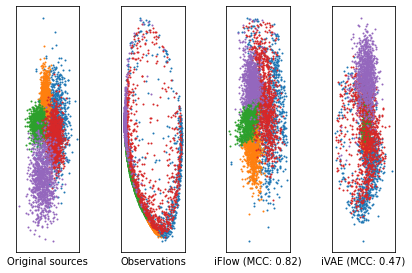

Dataset seed = 2


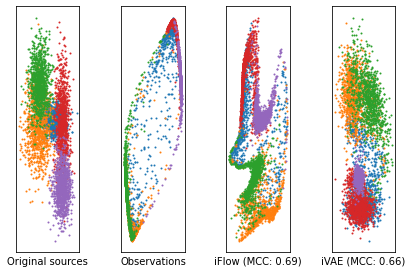

Dataset seed = 3


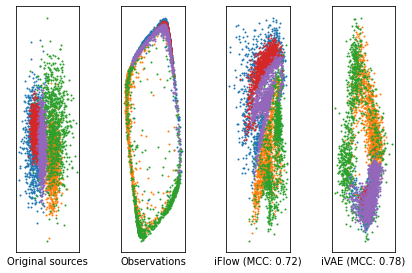

Dataset seed = 4


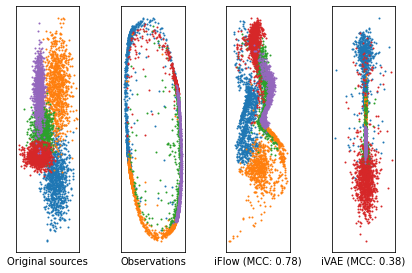

In [9]:
iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_5.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_5.txt').replace("\\","/")

seeds = range(1, 5)
data_args = "1000_5_2_2_5_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers=5, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)